In [201]:
import pandas as pd
import numpy as np

import operator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('multipleChoiceResponses.csv')
df.drop([0],inplace=True)

/sysroot/home/ekaterina/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [202]:
# Time column

df['Time from Start to Finish (seconds)'] = df['Time from Start to Finish (seconds)'].apply(int)

print('N of respondents: ',df.shape[0])
# Rejecting those who answered questions too fast:
df = df[df['Time from Start to Finish (seconds)']>60]
print('N of respondents with time>60 seconds: ',df.shape[0])

# drop "Time" column
df.drop(['Time from Start to Finish (seconds)'],axis=1,inplace=True)

N of respondents:  23859
N of respondents with time>60 seconds:  23463


In [203]:
def rename_some_salaries(salary):
    salary_new=salary
    if (salary!=salary): salary_new='-1'
    elif (salary=='I do not wish to disclose my approximate yearly compensation'): salary_new='secret'
    return salary_new

print('Salary values before renaming:')
print(df['Q9'].unique())
df['Q9']=df['Q9'].apply(lambda x: rename_some_salaries(x))
print('')
print('Salary values after renaming:')
print(df['Q9'].unique())

### !!! ###
# plot how many people didn't disclose their salary, then drop them
### !!! ###

# drop those who didn't disclose disclose their salary
df = df[(df['Q9']!='-1') & (df['Q9']!='secret')]
print(df['Q9'].unique())
print('')
print('N of respondents who disclose their salary: ',df.shape[0])

print('N of respondents who claim salary 0-10,000: ',(df[df['Q9']=='0-10,000']).shape[0])

all_salaries = ['0-10,000','10-20,000','20-30,000','30-40,000','40-50,000','50-60,000','60-70,000',
                       '70-80,000','80-90,000','90-100,000','100-125,000','125-150,000','150-200,000',
                       '200-250,000','250-300,000','300-400,000','400-500,000','500,000+']

Salary values before renaming:
[nan '10-20,000' '0-10,000'
 'I do not wish to disclose my approximate yearly compensation'
 '20-30,000' '125-150,000' '30-40,000' '50-60,000' '100-125,000'
 '90-100,000' '70-80,000' '80-90,000' '60-70,000' '400-500,000'
 '40-50,000' '150-200,000' '500,000+' '300-400,000' '200-250,000'
 '250-300,000']

Salary values after renaming:
['-1' '10-20,000' '0-10,000' 'secret' '20-30,000' '125-150,000'
 '30-40,000' '50-60,000' '100-125,000' '90-100,000' '70-80,000'
 '80-90,000' '60-70,000' '400-500,000' '40-50,000' '150-200,000'
 '500,000+' '300-400,000' '200-250,000' '250-300,000']
['10-20,000' '0-10,000' '20-30,000' '125-150,000' '30-40,000' '50-60,000'
 '100-125,000' '90-100,000' '70-80,000' '80-90,000' '60-70,000'
 '400-500,000' '40-50,000' '150-200,000' '500,000+' '300-400,000'
 '200-250,000' '250-300,000']

N of respondents who disclose their salary:  15423
N of respondents who claim salary 0-10,000:  4395


In [204]:
def order_subset(subset,whole_set):
    ordered = ['']*len(subset)
    i = 0
    for s in whole_set:
        if s in subset:
            ordered[i]=s
            i = i+1
    return ordered

def N_given_percent(df,percent):
    dict_countries = dict(df['Q3'].value_counts())
    N_tot = df.shape[0]
    N_percent = 0
    i = 1
    for key in dict_countries.keys():
        if (key=='Other'): continue
        if (key=='I do not wish to disclose my location'): continue
        print(i, key, dict_countries[key])
        N_percent += dict_countries[key]
        i += 1
        if (N_percent>=percent*N_tot): break

def print_dict(d):
    for key in d:
        print(key,int(d[key]))
        

def ranges_to_numerical(df, col_name='Q9', whole_set = all_salaries):
    subset = df[col_name].unique()
    ordered_subset = order_subset(subset,whole_set)
    dict_ranges = dict(df[col_name].value_counts())
    N_tot = df.shape[0]
    N_values = len(ordered_subset)
    N_values1 = len(dict_ranges)
    if (N_values!=N_values1):
        print('In ranges_to_numerical: (N_values!=N_values1)')
        return
    Ns_given_range = [0]*N_values
    percentile = 0
    ordered_dict = {}
    for key in ordered_subset:
        N_i = dict_ranges[key]
        percentile = percentile+100*N_i/N_tot
        ordered_dict[key] = percentile
    return ordered_dict

def calc_salary_percentile(x, ordered_dict):
    if (x in ordered_dict.keys()):
        return round(ordered_dict[x],3)
    else:
        return -100

In [205]:
ordered_dict = ranges_to_numerical(df, col_name='Q9', whole_set = all_salaries)
df['salary_percentile'] = df['Q9'].apply(lambda x: calc_salary_percentile(x,ordered_dict),3)
df['salary_percentile'].head()

2    41.043
3    28.496
5    28.496
7    41.043
8    28.496
Name: salary_percentile, dtype: float64

In [206]:
# How many countries have >70% of data scientists making 0-10'000
dict_countries = dict(df['Q3'].value_counts())
i=1
for country in dict_countries.keys():
    ordered_dict = ranges_to_numerical(df[df['Q3']==country], col_name='Q9', whole_set = all_salaries)
    if ('0-10,000') in ordered_dict.keys():
        if (ordered_dict['0-10,000']>=70):
            print(i,country,int(ordered_dict['0-10,000']))
            i+=1

1 Nigeria 78
2 Bangladesh 78
3 Iran, Islamic Republic of... 74
4 Egypt 72
5 Tunisia 74


In [207]:
df.fillna('na_values', inplace=True)

In [208]:
def plot_one_count_and_box_plot(df,col,x_label,order=None):
    if (col=='Q3'): # Q3 is country
        fig, (ax1,ax2) = plt.subplots(figsize=(18,12),nrows=2)
    else:
        fig, (ax1,ax2) = plt.subplots(figsize=(18,6),ncols=2)
    g1 = sns.boxplot(x=col,y='salary_percentile',data=df, ax=ax1,order=order)
    g2 = sns.countplot(x=col,data=df, ax=ax2,order=order)
    g1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    g2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
    g1.set_ylabel('salary percentile')
    #g1.set_ylim(0,100)
    g2.set_ylabel(' ')
    g1.set_xlabel(x_label)
    g2.set_xlabel(x_label)
    for p in ax2.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax2.annotate(p.get_height(), (x.mean(), y), ha='center', va='bottom')
        
def values_by_salary_order(df,col):
    d = df.groupby(by=col).mean().to_dict()['salary_percentile']
    sorted_d = sorted(d.items(), key=operator.itemgetter(1))
    countries_order = ['X']*len(sorted_d)
    for i in range(len(sorted_d)):
        countries_order[i]=sorted_d[i][0]
    return countries_order

28.496
100.0


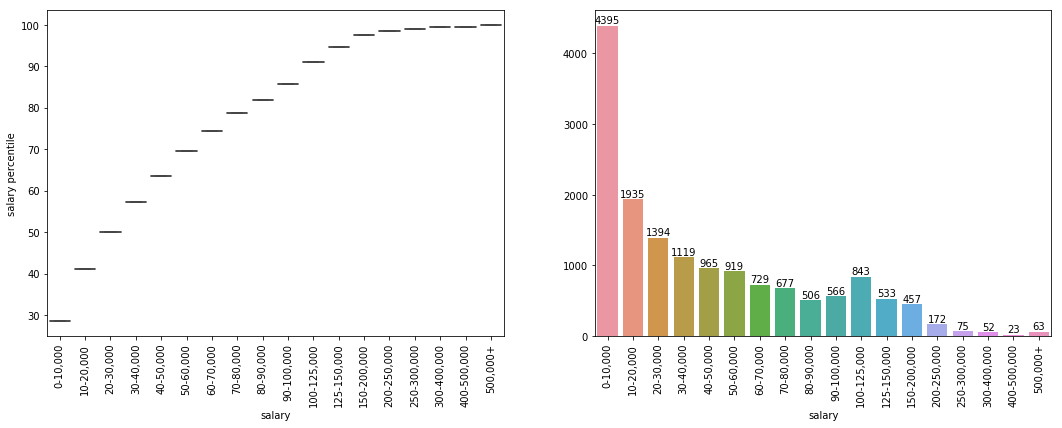

In [209]:
print(df['salary_percentile'].min())
print(df['salary_percentile'].max())

order = values_by_salary_order(df,'Q9')
plot_one_count_and_box_plot(df,'Q9','salary',order)

'\n# Q7 - industry\n# it\'s, in fact, not important\n# it\'s only important due to "I\'m a student value"\n\ndf_industry = df[[\'Q7\',\'salary_percentile\']]\ndf_industry = df_industry[df_industry[\'Q7\']!=\'Other\']\norder = values_by_salary_order(df_industry,\'Q7\')\nplot_one_count_and_box_plot(df_industry,\'Q7\',\'industry\',order)\n'

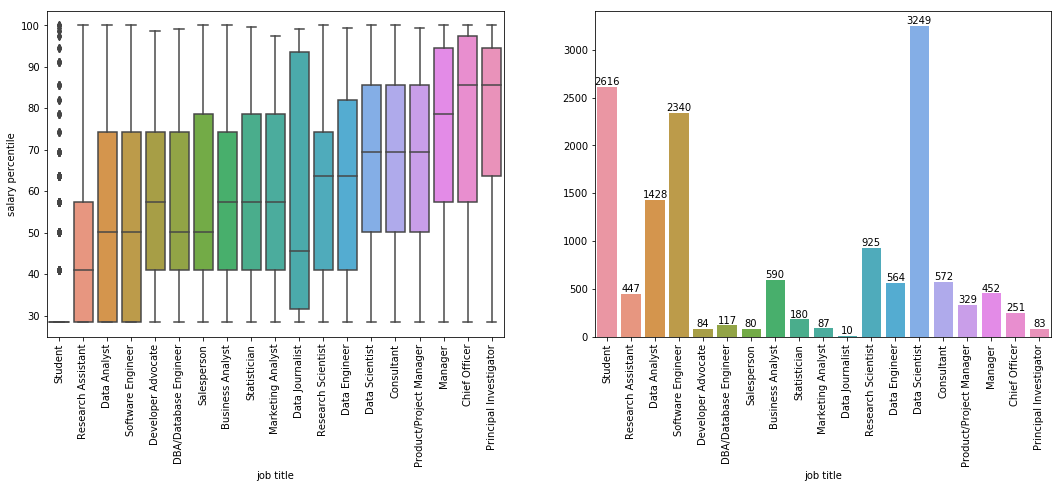

In [210]:
# Start with Q6

# Q6 - job title
# check if it's still important if remove student

df_title = df[['Q6','salary_percentile']]
df_title = df_title[df_title['Q6']!='Other']
order = values_by_salary_order(df_title,'Q6')
plot_one_count_and_box_plot(df_title,'Q6','job title',order)

"""
# Q7 - industry
# it's, in fact, not important
# it's only important due to "I'm a student value"

df_industry = df[['Q7','salary_percentile']]
df_industry = df_industry[df_industry['Q7']!='Other']
order = values_by_salary_order(df_industry,'Q7')
plot_one_count_and_box_plot(df_industry,'Q7','industry',order)
"""

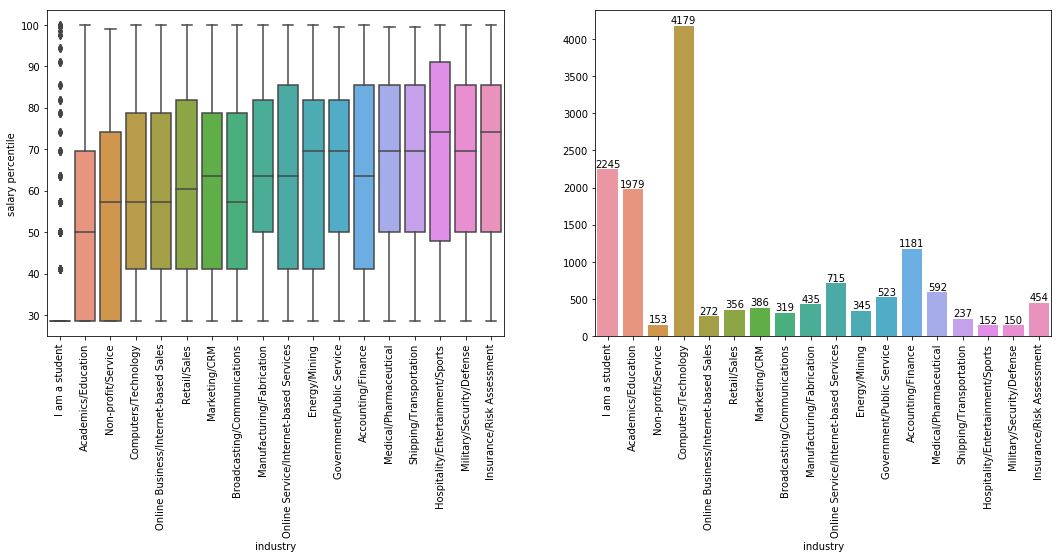

In [211]:
# Q7 - industry
# it's, in fact, not important
# it's only important due to "I'm a student value"

df_industry = df[['Q7','salary_percentile']]
df_industry = df_industry[df_industry['Q7']!='Other']
order = values_by_salary_order(df_industry,'Q7')
plot_one_count_and_box_plot(df_industry,'Q7','industry',order)

In [212]:
def is_student(x):
    if (x=='Student'): return 'Student'
    if (x=='I am a student'): return 'Student'
    return 'Not a student'

df['is_student'] = df['Q6'].apply(lambda x: is_student(x))

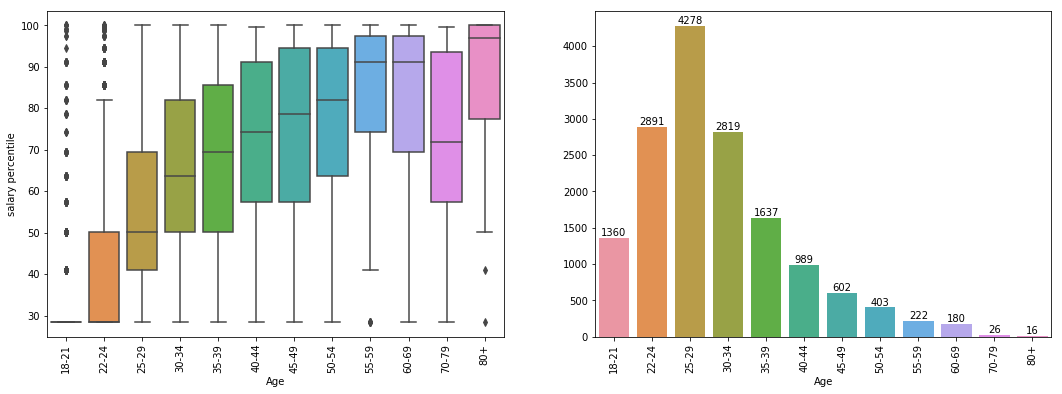

In [213]:
# Q2 - Age

order=['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70-79','80+']
plot_one_count_and_box_plot(df,'Q2','Age',order)

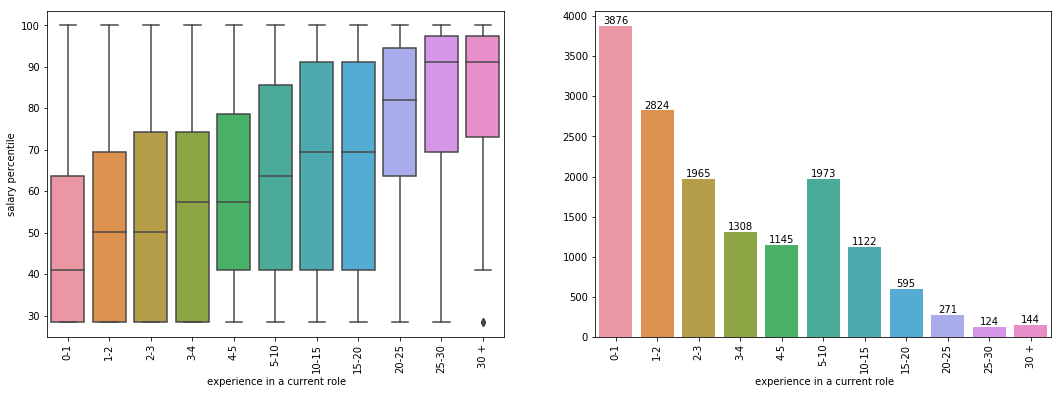

In [214]:
df_Q8 = df[['Q8','salary_percentile']]

df_Q8 = df_Q8[df_Q8['Q8']!='na_values']
order=['0-1','1-2','2-3','3-4','4-5','5-10','10-15','15-20','20-25','25-30','30 +']
plot_one_count_and_box_plot(df_Q8,'Q8',' experience in a current role',order)

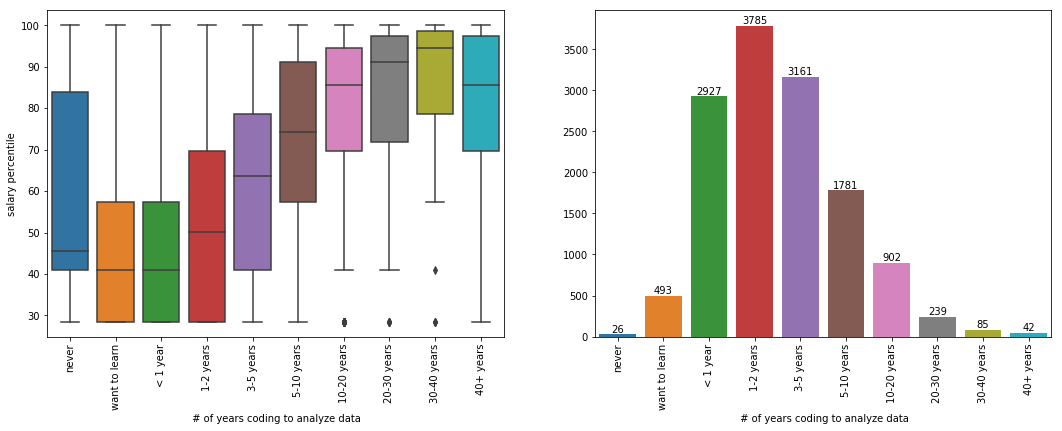

In [215]:
# Q24 - Number of years coding to analyze

df_Q24 = df[['Q24','salary_percentile']]

def rename_some_Q24(x):
    if (x=='I have never written code and I do not want to learn'): return 'never'
    if (x=='I have never written code but I want to learn'): return 'want to learn'
    return x

df_Q24 = df_Q24[df_Q24['Q24']!='na_values']
df_Q24['Q24'] = df_Q24['Q24'].apply(lambda x: rename_some_Q24(x))
order=['never','want to learn','< 1 year','1-2 years','3-5 years','5-10 years',
       '10-20 years','20-30 years','30-40 years','40+ years']
plot_one_count_and_box_plot(df_Q24,'Q24',' # of years coding to analyze data',order)

# check what roles are held by people who do not want to learn coding

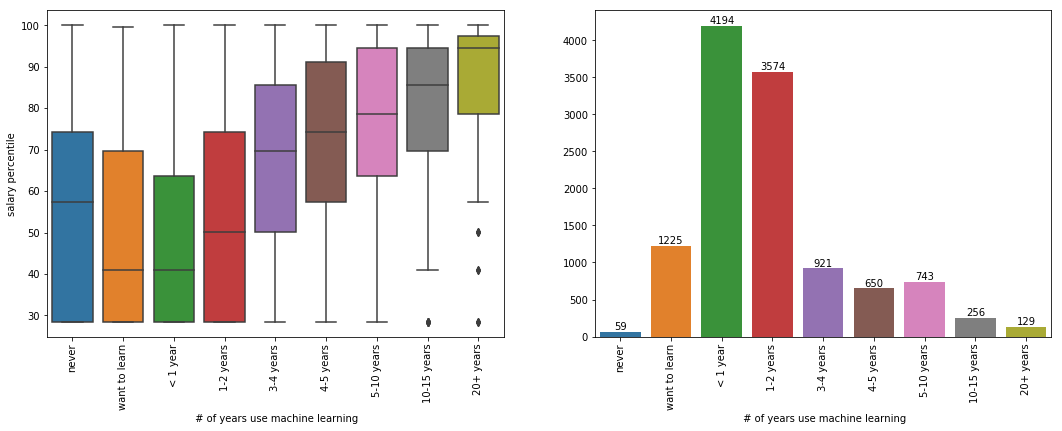

In [216]:
# Q25 - How many years use machine learning

df_Q25 = df[['Q25','salary_percentile']]

def rename_some_Q25(x):
    if (x=='I have never studied machine learning and I do not plan to'): return 'never'
    if (x=='I have never studied machine learning but plan to learn in the future'): return 'want to learn'
    return x

df_Q25 = df_Q25[df_Q25['Q25']!='na_values']
df_Q25['Q25'] = df_Q25['Q25'].apply(lambda x: rename_some_Q25(x))
order=['never','want to learn','< 1 year','1-2 years','3-4 years','4-5 years','5-10 years',
       '10-15 years','20+ years']
plot_one_count_and_box_plot(df_Q25,'Q25',' # of years use machine learning',order)

N of respondents:  15423
N of respondents from known countries:  14598
N of countries: 56
{'USA': 3391, 'India': 2320, 'China': 870, 'Russia': 581, 'Brazil': 557, 'Germany': 506, 'United Kingdom': 495, 'Canada': 441, 'France': 422, 'Japan': 411, 'Spain': 364, 'Italy': 244, 'Australia': 232, 'Poland': 214, 'Turkey': 199, 'Netherlands': 193, 'Ukraine': 165, 'Mexico': 152, 'Nigeria': 132, 'Singapore': 132, 'Israel': 124, 'Sweden': 118, 'Switzerland': 115, 'South Korea': 114, 'South Africa': 112, 'Portugal': 105, 'Indonesia': 103, 'Colombia': 101, 'Argentina': 99, 'Viet Nam': 96, 'Pakistan': 90, 'Greece': 83, 'Denmark': 81, 'Malaysia': 75, 'Belgium': 73, 'Ireland': 72, 'Hungary': 68, 'Belarus': 65, 'Chile': 60, 'Egypt': 55, 'Bangladesh': 55, 'New Zealand': 55, 'Iran': 55, 'Peru': 54, 'Norway': 53, 'Kenya': 53, 'Finland': 52, 'Romania': 51, 'Philippines': 49, 'Czech Republic': 48, 'Republic of Korea': 45, 'Thailand': 45, 'Hong Kong': 43, 'Austria': 40, 'Tunisia': 35, 'Morocco': 35}


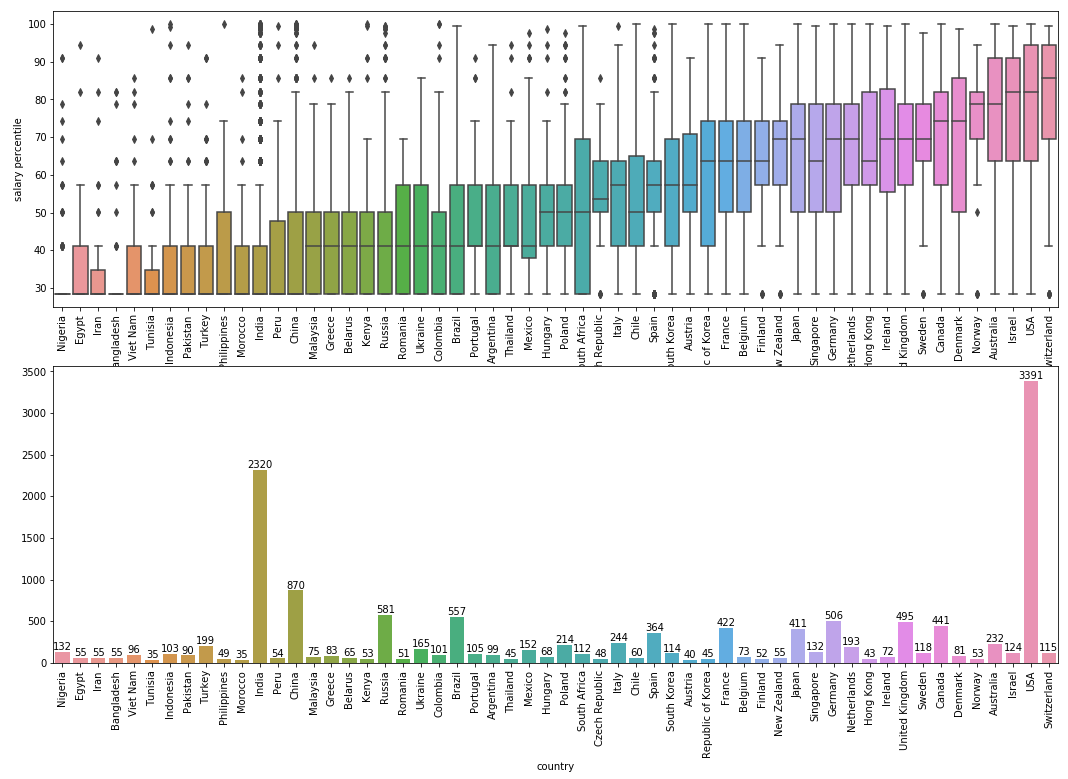

In [217]:
# Q3 - country

df_countries = df[['Q3','salary_percentile']]
print('N of respondents: ',df_countries.shape[0])
df_countries = df_countries[df_countries['Q3']!='Other']
df_countries = df_countries[df_countries['Q3']!='I do not wish to disclose my location']
print('N of respondents from known countries: ',df_countries.shape[0])

n_countries = len(dict(df_countries['Q3'].value_counts()))
print('N of countries:',n_countries)

# shorten names of some countries
def rename_some_countries(x):
    if (x=='United States of America'): return 'USA'
    if (x=='United Kingdom of Great Britain and Northern Ireland'): return 'United Kingdom'
    if (x=='Iran, Islamic Republic of...'): return 'Iran'
    if (x=='Hong Kong (S.A.R.)'): return 'Hong Kong'
    return x

df_countries['Q3']=df_countries['Q3'].apply(lambda x: rename_some_countries(x))
print(dict(df_countries['Q3'].value_counts()))

order = values_by_salary_order(df_countries,'Q3')
plot_one_count_and_box_plot(df_countries,'Q3','country',order)